# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # for Shapiro-Wilks test, ttest_ind

In [2]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

## Preliminary exploration of the dataset/dataframe

In [3]:
# Look at first 5 rows to see columns and type of data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA: Look at dtypes, shape, describe(), and null values.

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.shape

(768, 9)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Some Descriptive Stastistics Findings:
* Average Age of people in dataset: 33
* "Incidence" of Diabetes in dataset/sample: 0.35 (mean of Outcome which has 0 or 1)

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Finding: There are no null values in this dataset.  Clearly the dataset provided for this project has already been cleaned to remove null values, from the original dataset.  Thanks, LHL! (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

### EDA: Is the data for Outcomes unbalanced?

In [8]:
# Is the data for outcomes unbalanced?
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

<Axes: title={'center': 'Count of Number of Each Outcome'}, xlabel='Outcome', ylabel='count'>

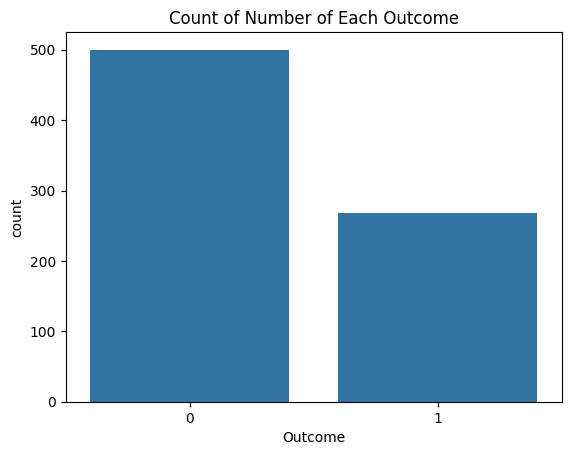

In [62]:
# Plot
plt.title('Count of Number of Each Outcome')
sns.countplot(x='Outcome',data=df)

Finding: The data is unbalanced.  There are nearly twice as many entries in this dataset that do not have diabetes, as do.
We will need to take care of this by either undersampling the 'Outcome=0' data, or oversampling (with replacement) the 'Outcome=1' data.

### EDA: How are predictor variables related to the target?  Create a correlation matrix to examine.

In [11]:
# Print correlation matrix
corr_matrix = df.corr(method='pearson')
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [20]:
# Sort the correlations from highest to lowest, for 'Outcome' only.
corr_matrix[['Outcome']].unstack().sort_values(ascending=False)

Outcome  Outcome                     1.000000
         Glucose                     0.466581
         BMI                         0.292695
         Age                         0.238356
         Pregnancies                 0.221898
         DiabetesPedigreeFunction    0.173844
         Insulin                     0.130548
         SkinThickness               0.074752
         BloodPressure               0.065068
dtype: float64

In [14]:
# Visualize correlation matrix, which will show the correlations between the predictor variables with each other, and with the target ('Outcome')
corr_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


Finding: It appears that the strongest predictors (based on correlation value) for an Outcome=1 are, in order of strength:

| Rank | Feature | Correlation with Outcome |
|---|-----------------------------| -------- |
| 1 | Glucose                     | 0.466581
| 2 | BMI                         | 0.292695
| 3 | Age                         | 0.238356
| 4 | Pregnancies                 | 0.221898
| 5 | DiabetesPedigreeFunction    | 0.173844
| 6 | Insulin                     | 0.130548
| 7 | SkinThickness               | 0.074752
| 8 | BloodPressure               | 0.065068

Finding:  Correlation between predictor variables
* No strong appearance of multi-collinearity, with the following mildly-strong correlation that should be kept in consideration when evaluating feature selection/model performance (maybe there is a bit of multi-collinearity and we violate assumption when both correlated features are placed in the model):
    - Between Age and Pregnancies (0.54)
    - Between SkinThickness and Insulin (0.44)
* The following have weak-ish correlations (> 0.20):
    - Age and:
        - Pregnancies (0.54)
        - Glucose (0.26)
        - BloodPressure (0.24)
    - BMI and:
        - Glucose (0.22)
        - BloodPressure (0.28)
        - SkinThickness (0.39)
        - Insulin (0.20)
    - SkinThickness and:
        -  BloodPressure (0.21)

In [45]:
# Set up list of Predictor columns (everything minus 'Outcome')
predictors = df.columns[~df.columns.isin(['Outcome'])]
predictors

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

### EDA: Show Distribution (Histogram) of Predictor variables

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

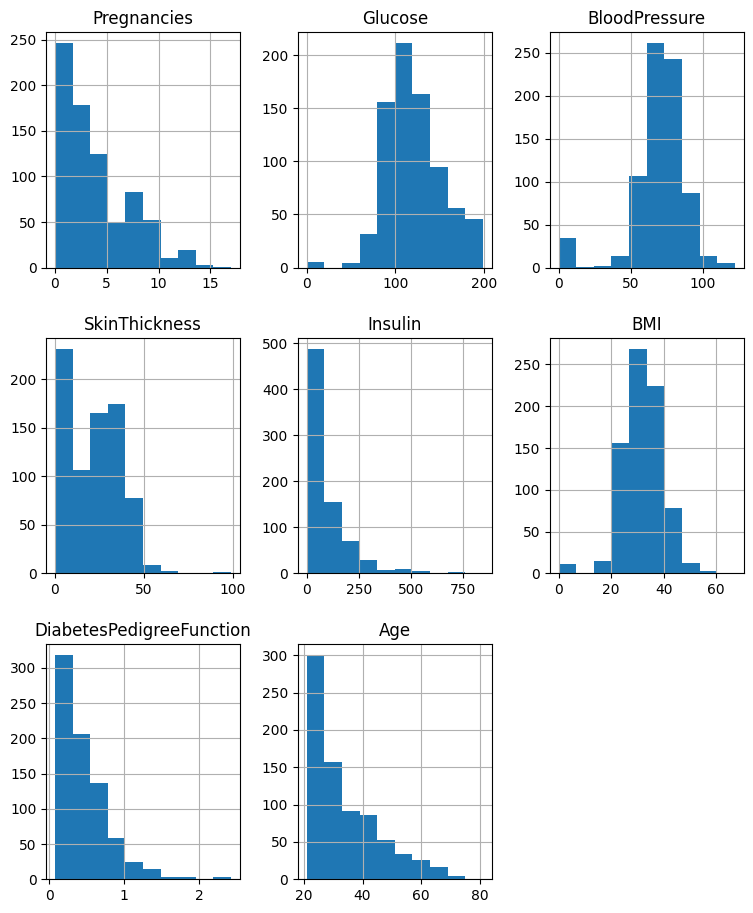

In [89]:
# Plot distributions of all numerical columns
df[predictors].hist(bins=10, figsize=(9, 11))

Findings: Most Predictors do not appear to be normally distributed, using the eye (a Shapiro-Wilks test would need to be done to confirm).
* Glucose and Blood Pressure may be more normally-distributed

Need to exercise caution with use of any models that assume normal distribution of independent variables.

EDA: Check for normality with statistical test (Shapiro-Wilks)

In [90]:
# Check for normality via Shapiro-Wilks

for predictor in predictors:
    stat, p = stats.shapiro(df[predictor])
    print (f"{predictor}: Shapiro-Wilks test p-value={p}.  Data are{'' if round(p, 2) > 0.05 else ' **NOT**'} normally distributed.")

Pregnancies: Shapiro-Wilks test p-value=1.6100101271064348e-21.  Data are **NOT** normally distributed.
Glucose: Shapiro-Wilks test p-value=1.987464880170986e-11.  Data are **NOT** normally distributed.
BloodPressure: Shapiro-Wilks test p-value=1.5844936208677322e-28.  Data are **NOT** normally distributed.
SkinThickness: Shapiro-Wilks test p-value=1.751799708531821e-21.  Data are **NOT** normally distributed.
Insulin: Shapiro-Wilks test p-value=7.915339984765649e-34.  Data are **NOT** normally distributed.
BMI: Shapiro-Wilks test p-value=1.8407586602041262e-15.  Data are **NOT** normally distributed.
DiabetesPedigreeFunction: Shapiro-Wilks test p-value=2.4777990069755762e-27.  Data are **NOT** normally distributed.
Age: Shapiro-Wilks test p-value=2.401829612553989e-24.  Data are **NOT** normally distributed.


Finding:  All predictor variables are *NOT* normally distributed according to Shapiro-Wilks test.

Caution must be employed in utilizing any models or methods that assume normality in the predictor variables.

### EDA: Compare means of each predictor variable between the two outcomes

In [ ]:
# Compare means of each predictor variable between the two outcomes
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Finding:
* Average Glucose level:
    - With diabetes: 141.26
    - Without diabetes: 109.98
* Average BMI:
    - With diabetes: 35.14
    - Without diabetes: 30.30


In [ ]:
# Show barplot of Predictor Means on 'Outcome' categories:
# This was my original code, but the plots take up too much screen real-estate, so commenting out and doing a different way.
# for predictor in predictors:
#     plt.title(f'Comparison of Means of {predictor} between Outcomes (Diabetic | Not Diabetic)')
#     sns.barplot(data=df, x='Outcome', y=predictor)
#     plt.show()

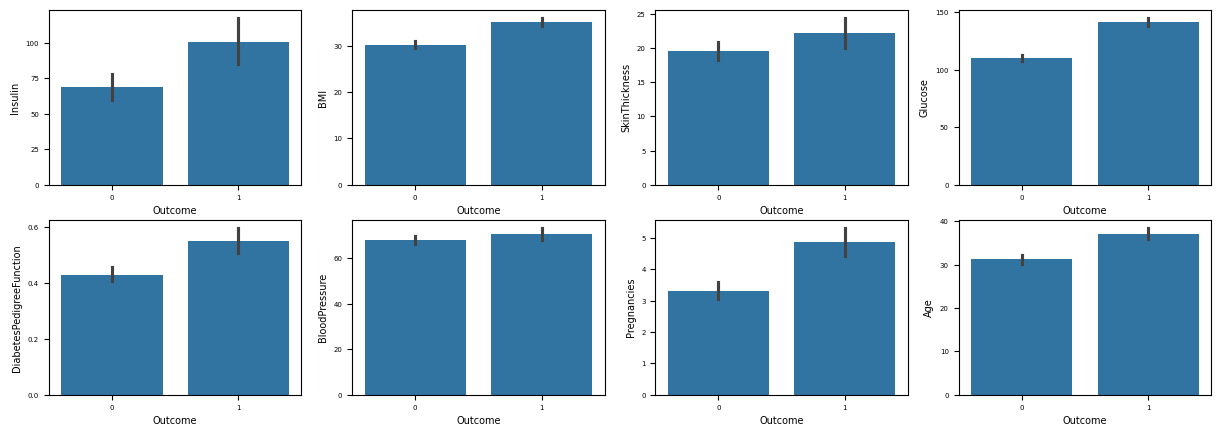

In [ ]:
# Show barplot of Predictor Means on 'Outcome' categories on a singular figure
# Credit: https://medium.com/crossml/exploratory-data-analysis-eda-and-classification-on-pima-indian-diabetes-dataset-e4c649a666e9

#relation between each feature and the outcome variable by barplot..
plt.figure(figsize=(15,5))
for i,col in enumerate(set(df.columns)-{'Outcome'}):
 plt.subplot(2,4,i+1)
 sns.barplot(data=df,x='Outcome',y=col,)
 plt.xlabel('Outcome', fontsize=7)
 plt.xticks(fontsize=5)
 plt.ylabel(col,fontsize=7)
 plt.yticks(fontsize=5)

Finding: Means for predictor variables differ between Outcomes.  t-tests would be needed to confirm statistical significance.

### EDA: Draw Boxplots to eyeball outliers in predictor variables

In [ ]:
# Traditional Boxplot - not using
#flierprops = dict(marker='o', markerfacecolor='green', markersize=2,
#                  linestyle='none')
#for predictor in df.columns[~df.columns.isin(['Outcome'])]:
#    plt.figure()
#    df.boxplot([predictor], flierprops=flierprops)

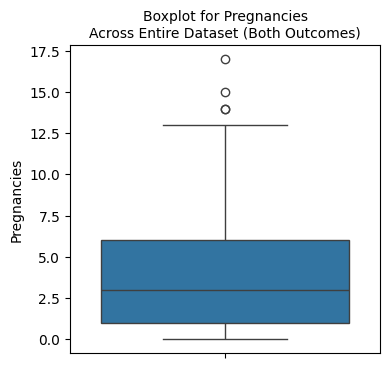

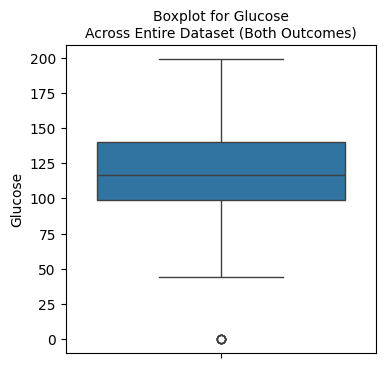

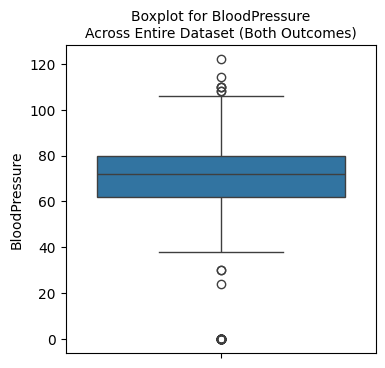

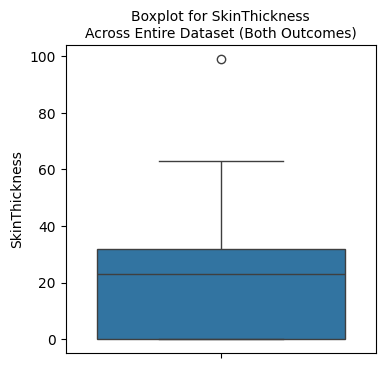

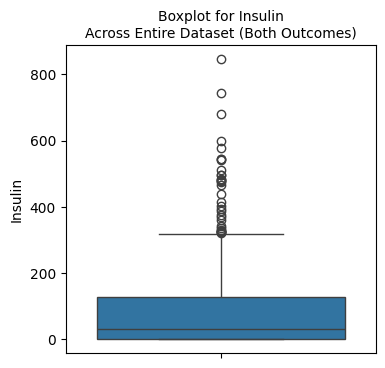

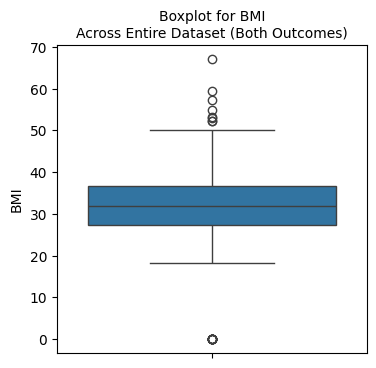

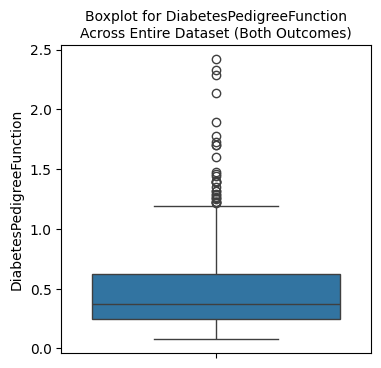

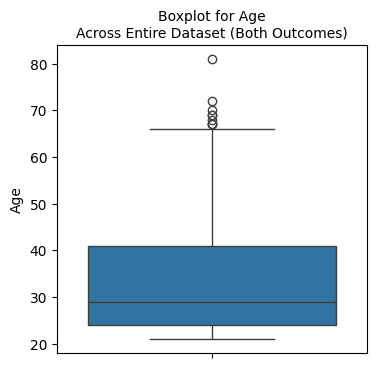

In [80]:
# Boxplots for all predictor variables across both Outcomes
for predictor in predictors:
    plt.figure(figsize=(4,4))
    plt.title(f'Boxplot for {predictor}\nAcross Entire Dataset (Both Outcomes)', fontsize=10)
    sns.boxplot(df[predictor])

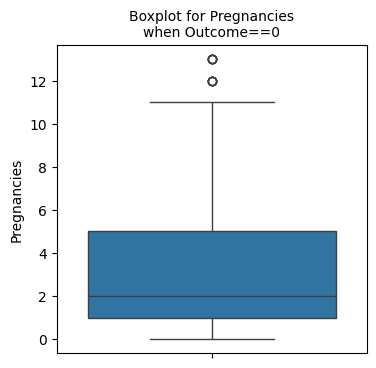

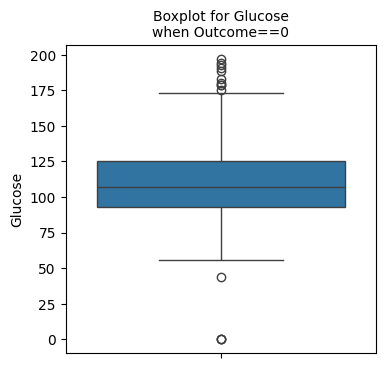

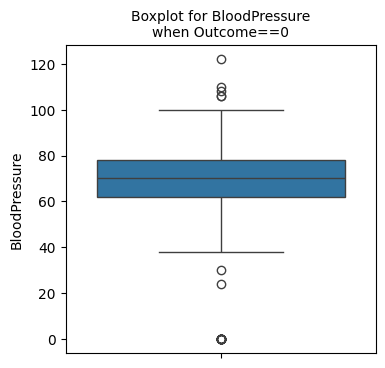

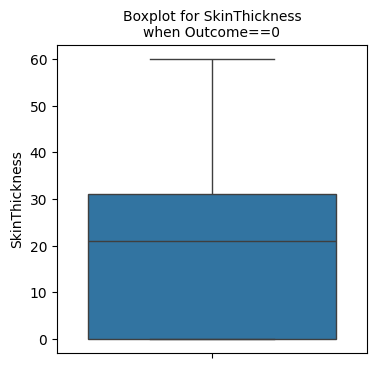

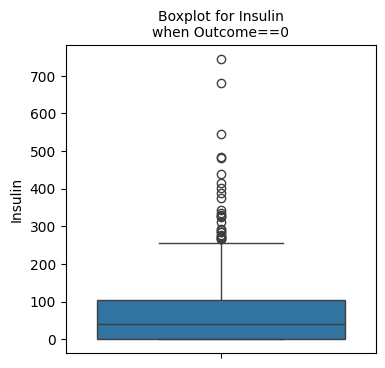

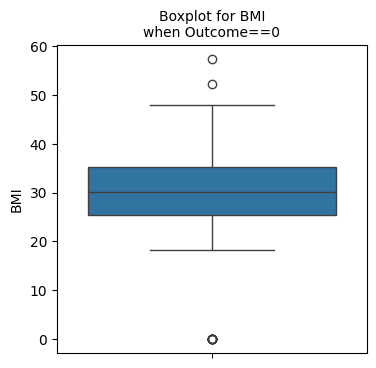

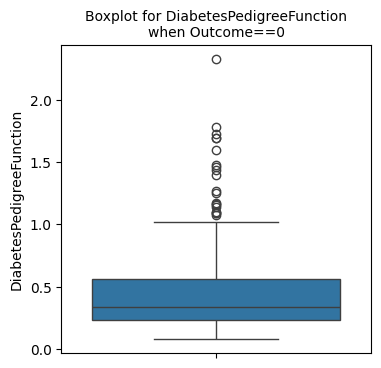

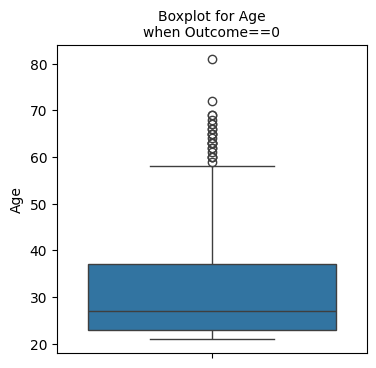

In [79]:
# Boxplots for all predictor variables when Outcome==0
mask = df['Outcome']==0
for predictor in predictors:
    plt.figure(figsize=(4,4))
    plt.title(f'Boxplot for {predictor}\nwhen Outcome==0', fontsize=10)
    sns.boxplot(df[mask][predictor])

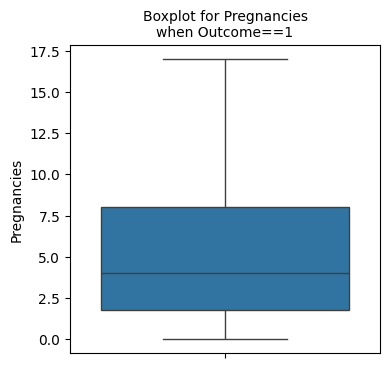

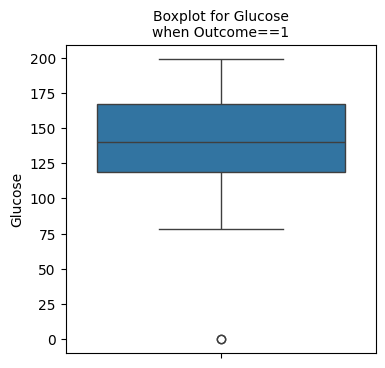

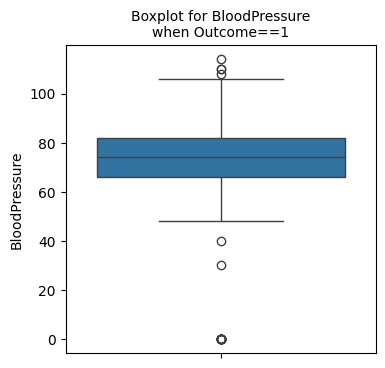

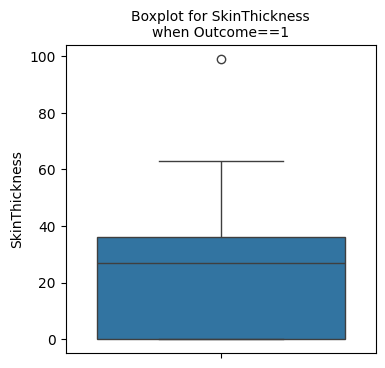

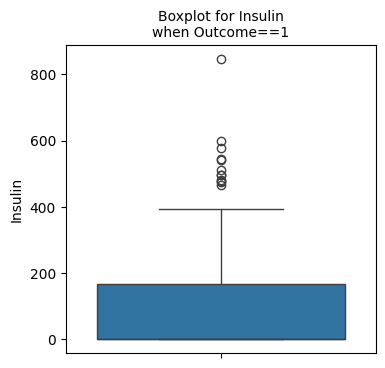

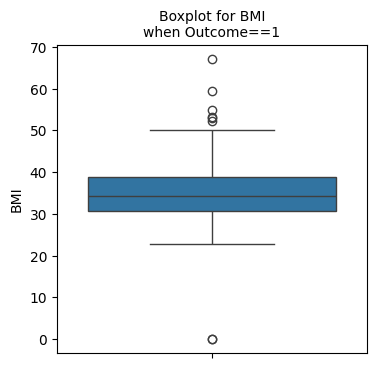

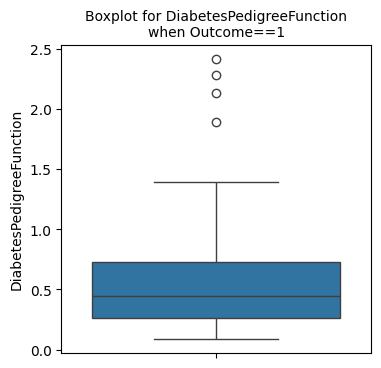

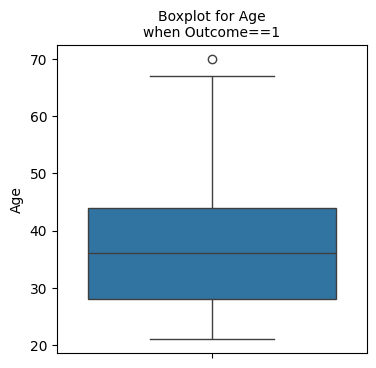

In [78]:
# Boxplots for all predictor variables when Outcome==1
mask = df['Outcome']==1
for predictor in predictors:
    plt.figure(figsize=(4,4))
    plt.title(f'Boxplot for {predictor}\nwhen Outcome==1', fontsize=10)
    sns.boxplot(df[mask][predictor])

### EDA: Compare means of each predictor variable between the two outcomes

In [44]:
# Compare means of each predictor variable between the two outcomes
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# Show barplot of Predictor Means on 'Outcome' categories:
# This was my original code, but the plots take up too much screen real-estate, so commenting out and doing a different way.
# for predictor in predictors:
#     plt.title(f'Comparison of Means of {predictor} between Outcomes (Diabetic | Not Diabetic)')
#     sns.barplot(data=df, x='Outcome', y=predictor)
#     plt.show()

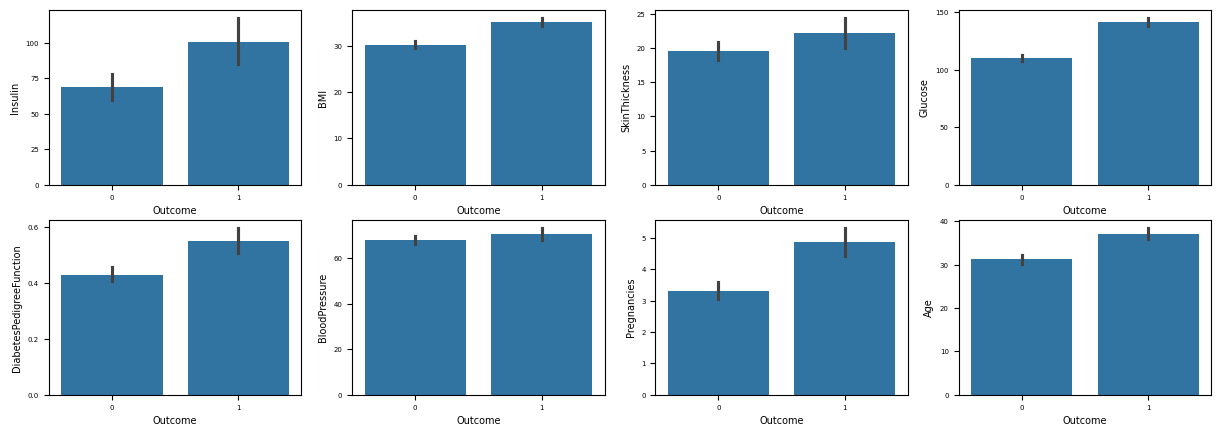

In [67]:
# Show barplot of Predictor Means on 'Outcome' categories on a singular figure
# Credit: https://medium.com/crossml/exploratory-data-analysis-eda-and-classification-on-pima-indian-diabetes-dataset-e4c649a666e9

#relation between each feature and the outcome variable by barplot..
plt.figure(figsize=(15,5))
for i,col in enumerate(set(df.columns)-{'Outcome'}):
 plt.subplot(2,4,i+1)
 sns.barplot(data=df,x='Outcome',y=col,)
 plt.xlabel('Outcome', fontsize=7)
 plt.xticks(fontsize=5)
 plt.ylabel(col,fontsize=7)
 plt.yticks(fontsize=5)

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.